In the main workbook, we ustilized clustering algorithm to form groups based on new features extracted from the initial five-point test. Now, we aim to develop a model to categorize new students' tests into the groups (*clusters from 0 to 3*) we created from the previous workbook.

Based on the client's input and our own analysis of visualized sample data of each student from clusters, we have labeled the clusters as follows: <br>

Cluster '0': *Slow Learner* <br>
Cluster '1': *Quick Thinker* <br>
Cluster '2': *Complex Thinker*<br>
Cluster '3': *Hesitant Student*

(*This part could not have been a part of the main notebook as the main notebook already takes a long time to run*)

# _**PHASE 3 : Prediction**_

We will start by importing the necessary libraries and the _**prepared**_ dataset.

In [607]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [608]:
df = pd.read_csv('5dots\dataset_with_clusters.csv')

# _**K-Nearest Neighbor**_

[K-NN is simple, makes no assumptions and is easy to implement for multi-class problem.](https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/) For these reasons, we will use k-Nearest Neighbor as an initial model to establish a baseline performance.


## 🛠️ _**Preprocessing**_

### 🎯 Target variable

The target variable is the variable we are trying to predict. There are four values of clusters in the *'Cluster'* column, which are numbers from 0 to 3. 

In [609]:
y = df['Cluster']

### 🛠️ Features

Since the purpose of this model is to set a baseline, we will use all features without dropping any features. This is also because we used all features to create the cluster. However, *having more features does not mean a higher chance of guessing correctly*, but it will show a decent baseline.

In [610]:
# We are using all features except the target variable, and the dataset is already cleaned and thus it does not include student id
X = df.drop('Cluster', axis=1) 

### 🪓 Splitting into Train/Test

Before the model is trained, we are splitting the dataset into train and test set. The reasoning here is that the model trains with, for example 80% of the data available, and the other 20% is used to ask it to predict the target variable. For now, because the true target variable of that 20% is known, we can compare the predictions with the ground truth and devise how well the model performs.

In [611]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ⚖️ Scaling
The K-Nearest Neighbors (KNN) algorithm and Support Vector Machines (SVM) both rely on distance calculations to make predictions. For instance, KNN uses the concept of "being near" to decide cluster membership for new data points. This "being near" is calculated using [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance), which measures absolute differences between values of the same feature, but not among different features.

Therefore, it is necessary to scale all features to ensure they use the same unit of measurement. Without scaling, features with larger ranges can disproportionately influence the distance calculations, leading to biased results. A common approach is to use [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) as the unit, transforming all features to have a mean of 0 and a standard deviation of 1. This transformation is achieved using the `StandardScaler` from sklearn.

In [612]:
from sklearn.preprocessing import StandardScaler

In [613]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🧬 _**Modelling**_

In [614]:
from sklearn.neighbors import KNeighborsClassifier

The default parameters are used to set a baseline performance. This provides a straightforward starting point before performing any hyperparameter tuning or adjustments.

In [615]:
knn = KNeighborsClassifier() # kNN model parameters are set to default: n_neighbors=5, weights='uniform'

Training the model on scaled data ensures that features with larger ranges do not disproportionately affect the distance calculations in the KNN algorithm. 

In [616]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Predictions are made on the scaled test set to maintain consistency with the training data preprocessing. This ensures that the model's performance evaluation is accurate and not biased by differences in feature scaling.

In [617]:
y_pred_knn = knn.predict(X_test_scaled)

Accuracy is chosen as the evaluation metric to provide a simple measure of the proportion of correct predictions. More detailed evaluation will be done in the next segment.

In [618]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn*100:.2f}%")

KNN Accuracy: 84.77%


## 🔬 _**Evaluation**_

### _**Classification Report**_

In [619]:
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       153
           1       0.85      0.86      0.85       162
           2       0.82      0.92      0.87       336
           3       0.86      0.78      0.81       255

    accuracy                           0.85       906
   macro avg       0.86      0.84      0.85       906
weighted avg       0.85      0.85      0.85       906



##### _**Conclusion**_

[Macro Average treats all classes equally, regardless of how many instances each class has. Weighted Average takes the class distribution into account, providing a more realistic measure of the model's performance across an imbalanced dataset.](https://sefidian.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/) The macro average for precision, recall, and F1-score is around 0.85, 0.84, and 0.85 respectively. This means that the model performs consistently across all classes without being biased towards any particular class. The weighted average for precision, recall, and F1-score is also 0.85. <span id="oversampling-conclusion">This</span> suggests a balanced performance overall, despite the fact we haven't used any *over-/undersampling* techniques so far.

> The model performed generally well, and works for our task. The recalls for cluster 0 (Slow Learner) and 3 (Hesitant Student) are low.

### _**Confusion Matrix**_

In [620]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

We can now visualize the confusion matrix to better understand:

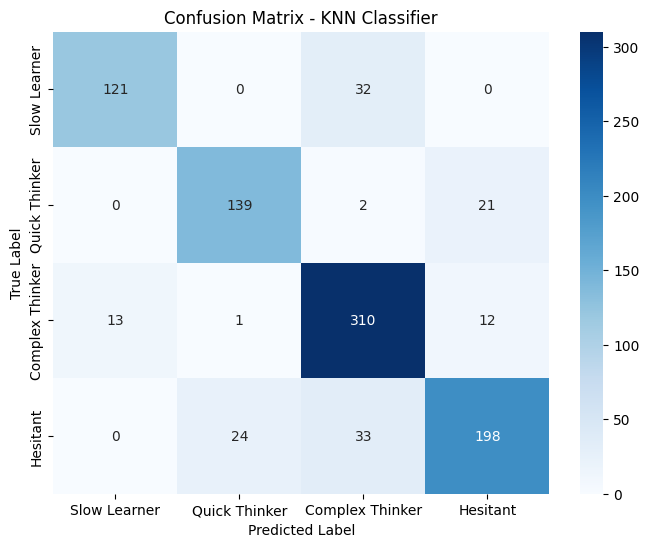

In [621]:
# Define class labels
class_labels = ["Slow Learner", "Quick Thinker", "Complex Thinker", "Hesitant"]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

The model is likely to mistake _**Slow Learners**_ with _**Complex Thinkers**_ (13 times). _**Quick Thinkers**_ are mistaken with _**Hesitant Students**_ (24 times) and very rarely with _**Complex Thinker**_ (1 time). _**Complex Thinkers**_ are mistaken with _**Slow Learners**_ (32 times) and _**Hesitant Students**_ (33 times). _**Hesitant Students**_ are mistaken with _**Quick Thinkers**_ (21 times) and _**Complex Thinkers**_ (12 times).

>> This cannot be explained logically. It could either mean the clusters are not correctly labeled or there is noise in the dataset. 

### _**Overfitting, Underfitting, and Generalization**_

To assess our model for overfitting, underfitting, and generalization, we'll employ two steps:

- **Initial Evaluation**: 
We'll begin by comparing the classification reports obtained from both the test and train sets. This initial examination will provide insights into any inconsistencies between the model's performance on seen versus unseen data.

- **Cross-Validation Analysis**:
Utilizing the k-fold cross-validation technique, we'll conduct a series of evaluations, training the models on various subsets of the data and assessing their performance on unseen partitions. This method ensures an estimation of model performance and helps reveal potential overfitting or underfitting tendencies.

##### _**1. Initial Evaluation**_

In [622]:
a = knn.predict(X_train_scaled)
a_accuracy = accuracy_score(y_train, a)
print(f"KNN Accuracy on training data: {a_accuracy:.6f}")
b = knn.predict(X_test_scaled)
b_accuracy = accuracy_score(y_test, b)
print(f"KNN Accuracy on test data: {b_accuracy:.6f}")

print("Training classification report:\n", classification_report(y_train, a))
print("Test classification report:\n", classification_report(y_test, b))

KNN Accuracy on training data: 0.911123
KNN Accuracy on test data: 0.847682
Training classification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92       723
           1       0.91      0.96      0.94       513
           2       0.86      0.96      0.91      1329
           3       0.94      0.85      0.89      1058

    accuracy                           0.91      3623
   macro avg       0.92      0.91      0.92      3623
weighted avg       0.92      0.91      0.91      3623

Test classification report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       153
           1       0.85      0.86      0.85       162
           2       0.82      0.92      0.87       336
           3       0.86      0.78      0.81       255

    accuracy                           0.85       906
   macro avg       0.86      0.84      0.85       906
weighted avg       0.85      0.85      0.85    

>> There is a slight drop in performance on the test set compared to the training set, the model still maintains good generalization capabilities. 

##### _**2. Cross Validation Analysis**_

We will use k-fold cross-validation to assess the performance of the kNN model. [This technique splits the dataset into k subsets (folds), trains the model on k-1 folds, and evaluates it on the remaining fold. This process is repeated k times, with each fold serving as the test set exactly once.](https://medium.com/analytics-vidhya/a-complete-guide-to-choose-the-correct-cross-validation-technique-d70810a02f27#:~:text=It%20is%20the,any%20(K%2D1))

The choice of k-fold cross-validation is justified not only for its simplicity but also because it is suitable for datasets where the distribution of classes is (almost) evenly balanced. When examining the macro average and weighted average from the classification report, the similarity between these metrics suggests that the data is evenly distributed across different classes

[A value of k=10 is very common in the field of applied machine learning, and is recommended when struggling to choose a value for the dataset.](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85#:~:text=A%20value%20of%20k%3D10%20is%20very%20common%20in%20the%20field%20of%20applied%20machine%20learning%2C%20and%20is%20recommend%20if%20you%20are%20struggling%20to%20choose%20a%20value%20for%20your%20dataset.) And thus, we will use 10-fold cross-validation

In [623]:
from sklearn.model_selection import cross_val_score

In [624]:
X_Scaled = StandardScaler().fit_transform(X) # Scale the X data again because kNN is a distance-based algorithm

In [625]:
scores = cross_val_score(knn, X_Scaled, y, cv=10)
print(f"kNN Cross Validation Scores: {scores}")
print(f"kNN Cross Validation Mean Score: {np.mean(scores)}")
print(f"kNN Cross Validation Standard Deviation: {np.std(scores)}")

kNN Cross Validation Scores: [0.8410596  0.84547461 0.83664459 0.86313466 0.83222958 0.86534216
 0.87196468 0.8785872  0.84988962 0.86946903]
kNN Cross Validation Mean Score: 0.8553795737365449
kNN Cross Validation Standard Deviation: 0.015465438195859644


>> In conclusion, the kNN model showed really consistent and steady performance during our tests. On average, it correctly predicted about 85.5% of the data, which is quite good. The fact that the kNN Cross Validation Standard Deviation is low means our model is pretty reliable. So, it seems like our model could work well on new data we haven't seen before. 

##### _**The next course of action:**_

The dataset can be considered high dimensional, because there are 95 features. And [KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.](https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/#:~:text=KNN%20works%20well%20with%20small%20number%20of%20input%20variables%20but%20as%20the%20numbers%20of%20variables%20grow%20K%2DNN%20algorithm%20struggles%20to%20predict%20the%20output%20of%20new%20data%20point.)


According to Scikit Cheat Sheet, [you can proceed from KNN to Support Vector Machine if you are not satisfied with the outcome of KNN](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Since [Support Vector Machine works with high dimensionality and is good at capturing the underlying patterns](https://iq.opengenus.org/advantages-of-svm/), this will be the logical action to take.


# _**Support Vector Machine**_

## 🛠️ _**Preprocessing**_

### 🎯 Target variable

The target variable is the variable we are trying to predict. There are four values of clusters in the *'Cluster'* column, which are numbers from 0 to 3. 

In [626]:
y = df['Cluster']

### 🛠️ Feature Selection

As previously mentioned, [SVM (Support Vector Machine) performs well with high-dimensional data](https://iq.opengenus.org/advantages-of-svm/#:~:text=handle%20High%20dimensional%20data), meaning the algorithm is effective when working with datasets that have a large number of features. This does not imply that having more data samples is always better, but rather that SVM can handle datasets with many features without significant performance degradation. However, having a sufficient number of data samples is still important for training an effective model.

We will take a deductive approach to feature selection in this model. [The deductive approach to feature selection looks at all the features as whole and removes those features that seem to have a poor correlation with the target variable.](https://fhict.instructure.com/courses/13770/pages/feature-selection#:~:text=The%20deductive%20approach%20to%20feature%20selection%20looks%20at%20all%20the%20features%20as%20whole%20and%20removes%20those%20features%20that%20seem%20to%20have%20a%20poor%20correlation%20with%20the%20target%20variable.)

To implement a deductive approach, we will group the features based on their correlation indices. 

In [627]:
# Create a correlation matrix
corr = df.corr()

To decide on which groups there should be, we should look at the lowest and the highest absolute values (modulus) of correlation indices:

In [628]:
print('The Highest Correlations with the Cluster Column:\n')
print(corr.abs().nlargest(6, 'Cluster')['Cluster'])

print('\nThe Lowest Correlations with the Cluster Column:\n')
print(corr.abs().nsmallest(6, 'Cluster')['Cluster'])

The Highest Correlations with the Cluster Column:

Cluster                  1.000000
total_values_count       0.409233
Box_1_Submission         0.391261
unique_patterns_count    0.382899
Box_2_Submission         0.382086
Box_3_Submission         0.352273
Name: Cluster, dtype: float64

The Lowest Correlations with the Cluster Column:

Box_3_Unclicks    0.004469
Box_7_Unclicks    0.010460
Box_2_Unclicks    0.016167
Box_4_Unclicks    0.025004
Box_5_Unclicks    0.027882
Box_1_Unclicks    0.030430
Name: Cluster, dtype: float64


The highest absolute value of correlation index is 0.409. Thus there will be four groups:

1. Group A: All features
2. Group B: Features where the absolute value of correlation index is higher than 0.1
3. Group C: Features where the absolute value of correlation index is higher than 0.2
4. Group D: Features where the absolute value of correlation index is higher than 0.3

In [629]:
# All features
X_Group_A = df.drop('Cluster', axis=1) 

# Features' column names with correlation higher than 0.1
correlations_higher_than_0_point_1 = corr[corr['Cluster'].abs() > 0.1]['Cluster']
print(correlations_higher_than_0_point_1.index.tolist())
Group_B = correlations_higher_than_0_point_1.drop('Cluster') 

# Features'column names with correlation higher than 0.2
correlations_higher_than_0_point_2 = corr[corr['Cluster'].abs() > 0.2]['Cluster']
print(correlations_higher_than_0_point_2.index.tolist())
Group_C = correlations_higher_than_0_point_2.drop('Cluster')  

# Features'column names with correlation higher than 0.3
correlations_higher_than_0_point_3 = corr[corr['Cluster'].abs() > 0.3]['Cluster']
print(correlations_higher_than_0_point_3.index.tolist())
Group_D = correlations_higher_than_0_point_3.drop('Cluster') 

['pauses', 'unique_patterns_count', 'total_values_count', 'duplicates', 'Box_1_Submission', 'Box_2_Submission', 'Box_3_Submission', 'Box_4_Submission', 'Box_5_Submission', 'Box_6_Submission', 'Box_7_Submission', 'Box_8_Submission', 'Box_9_Submission', 'Box_10_Submission', 'Box_11_Submission', 'Box_1_Lines', 'Box_2_Lines', 'Box_3_Lines', 'Box_4_Lines', 'Box_5_Lines', 'Box_6_Lines', 'Box_7_Lines', 'Box_8_Lines', 'Box_9_Lines', 'Box_10_Lines', 'Box_11_Lines', 'Box_12_Lines', 'Box_13_Lines', 'Box_14_Lines', 'Box_15_Lines', 'Box_16_Lines', 'Box_17_Lines', 'Box_18_Lines', 'Box_1_Clicks', 'Box_2_Clicks', 'Box_3_Clicks', 'Box_4_Clicks', 'Box_5_Clicks', 'Box_6_Clicks', 'Box_7_Clicks', 'Box_8_Clicks', 'Box_9_Clicks', 'Box_10_Clicks', 'Box_11_Clicks', 'Box_12_Clicks', 'Box_13_Clicks', 'Box_14_Clicks', 'Box_15_Clicks', 'Box_16_Clicks', 'Box_17_Clicks', 'Box_18_Clicks', 'Box_1_Timegap', 'Box_2_Timegap', 'Box_3_Timegap', 'Box_4_Timegap', 'Box_5_Timegap', 'Box_6_Timegap', 'Box_7_Timegap', 'Box_8_Time

### 🪓 Splitting into Train/Test

Before the model is trained, we are splitting the dataset into train and test set. The reasoning here is that the model trains with, for example 80% of the data available, and the other 20% is used to ask it to predict the target variable. For now, because the true target variable of that 20% is known, we can compare the predictions with the ground truth and devise how well the model performs.

We will compare four models with different groups of features to assess which group of features works the best initially. Therefore, it is a good practice to use the same train and test sets for all of them.

In [630]:
X_Group_A_train, X_Group_A_test, y_train_A, y_test_A = train_test_split(X_Group_A, y, test_size=0.2, random_state=42) 

### 🪓 Handling Imbalanced Data
[Almost every dataset has an unequal representation of classes. This isn’t a problem as long as the difference is small. However, when one or more classes are very rare, many models don’t work too well at identifying the minority classes.](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100#:~:text=What%20makes%20Imbalanced,the%20minority%20classes.) One way to fix this problem is to use over-/undersampling techniques. These techniques have the advantage of resolving imbalanced data, oversampling [can increase the chance of overfitting](https://crunchingthedata.com/oversampling-vs-undersampling/#When%20Should%20You%20Resample%20Your%20Data?:~:text=Can%20increase%20the%20chance%20of%20overfitting), and undersampling [can lead to loss of data](https://crunchingthedata.com/oversampling-vs-undersampling/#When%20Should%20You%20Resample%20Your%20Data?:~:text=of%20your%20model.-,Loses%20information,-.%20The%20next%20disadvantage)


_The graph above shows that out dataset has unevenly distributed classes._

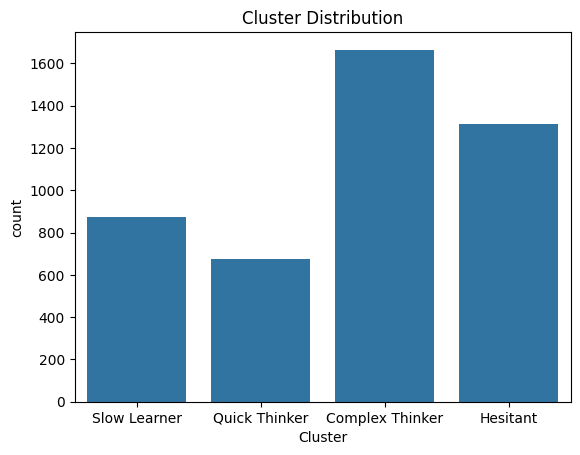

In [631]:
sns.countplot(x='Cluster', data=df)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Slow Learner", "Quick Thinker", "Complex Thinker", "Hesitant"])
plt.title('Cluster Distribution')
plt.show()

However, based on the macro and weighted average values from the classification report of the baseline model (KNN), the uneven distribution of classes does not seem to introduce significant biases towards any particular class. 

>> Decision: Considering this, we have been careful about resampling the dataset. We used SMOTE to oversample the minority classes, but there was no significant improvement in the result. Since this notebook is also a school project, we have left the oversampling part commented for the sake of the learning outcome.

In [632]:
# from imblearn.over_sampling import SMOTE

In [633]:
# smote = SMOTE(random_state=42)
# X_Group_A_train, y_train = smote.fit_resample(X_Group_A_train, y_train)

From the ~~oversampled~~ split test and  train sets, we can filter the features to form the group of features. This is done here because when you later scale the features it will involve subtracting the mean values. Therefore, this helps prevent information leakage between feature groups. For example, if I scale all features together, information from one group may influence the scaling of another group, leading to inaccurate results:

In [634]:
# Drop all the columns except the ones in Group_B
X_Group_B_train = X_Group_A_train[Group_B.index]
X_Group_B_test = X_Group_A_test[Group_B.index]

# Drop all the columns except the ones in Group_C
X_Group_C_train = X_Group_A_train[Group_C.index]
X_Group_C_test = X_Group_A_test[Group_C.index]

# Drop all the columns except the ones in Group_D
X_Group_D_train = X_Group_A_train[Group_D.index]
X_Group_D_test = X_Group_A_test[Group_D.index]

### ⚖️ Scaling
SVM relies on distance calculations, particularly the distance between data points and the decision boundary, to make predictions. [Scaling the feature values improves the classifier performance significantly.](https://www.baeldung.com/cs/svm-feature-scaling#:~:text=standardizing%20the%20feature%20values%20improves%20the%20classifier%20performance%20significantly.) A common approach is to use [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) as the unit, transforming all features to have a mean of 0 and a standard deviation of 1. This transformation is achieved using the `StandardScaler` from sklearn.

In [635]:
scaler = StandardScaler()

In [636]:
# Scale test and train data for Group A
X_Group_A_train_scaled = scaler.fit_transform(X_Group_A_train)
X_Group_A_test_scaled = scaler.transform(X_Group_A_test)

# Scale test and train data for Group B
X_Group_B_train_scaled = scaler.fit_transform(X_Group_B_train)
X_Group_B_test_scaled = scaler.transform(X_Group_B_test)

# Scale test and train data for Group C
X_Group_C_train_scaled = scaler.fit_transform(X_Group_C_train)
X_Group_C_test_scaled = scaler.transform(X_Group_C_test)

# Scale test and train data for Group D
X_Group_D_train_scaled = scaler.fit_transform(X_Group_D_train)
X_Group_D_test_scaled = scaler.transform(X_Group_D_test)

## 🧬 _**Modelling**_

In this part, we will model four SVM with their default parameters in order to see the outcome. Hyperparameter tuning will happen in the next segment.

In [637]:
from sklearn.svm import SVC

In [638]:
# This is the SVM model built using Group A features
svm_Group_A = SVC()
svm_Group_A.fit(X_Group_A_train_scaled, y_train)
y_pred_svm = svm_Group_A.predict(X_Group_A_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy for Group A: {accuracy_svm*100:.2f}%")

SVM Accuracy for Group A: 96.36%


In [639]:
# This is the SVM model built using Group B features
svm_Group_B = SVC()
svm_Group_B.fit(X_Group_B_train_scaled, y_train)
y_pred_svm = svm_Group_B.predict(X_Group_B_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy for Group B: {accuracy_svm*100:.2f}%")

SVM Accuracy for Group B: 95.36%


In [640]:
# This is the SVM model built using Group C features
svm_Group_C = SVC()
svm_Group_C.fit(X_Group_C_train_scaled, y_train)
y_pred_svm = svm_Group_C.predict(X_Group_C_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy for Group C: {accuracy_svm*100:.2f}%")

SVM Accuracy for Group C: 91.28%


In [641]:
# This is the SVM model built using Group D features
svm_Group_D = SVC()
svm_Group_D.fit(X_Group_D_train_scaled, y_train)
y_pred_svm = svm_Group_D.predict(X_Group_D_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy for Group D: {accuracy_svm*100:.2f}%")

SVM Accuracy for Group D: 82.67%


#### _**Conclusion**_

Based on a brief accuracy check, we noticed a slight drop in accuracy from Group A to Group B, around 1.0%, and a larger decrease of about 4% from Group B to Group C. Group D had the lowest accuracy, coming in at 82%.


>> Decision: Even features with a correlation index (absolute value) below 0.1 still play a role in how well our model predicts outcomes. Since Support Vector Machine tends to handle lots of features well, we've decided to stick with Group A features for our final model. In Group A, we haven't dropped any features, so we're using all available data to build the final model.

## 🔬 _**Evaluation**_

## _**1. Classification Report for train and test set of Group A features:**_

By comparing two reports, we can see if there is a sign of overfitting, model's generalization capacity and the model's performance.

In [642]:
# find overfitting by comparing the accuracy of the model on the training data and the test data
a = svm_Group_A.predict(X_Group_A_train_scaled)
a_accuracy = accuracy_score(y_train, a)
print(f"SVM Accuracy on training data for Group A: {a_accuracy:.6f}")
b = svm_Group_A.predict(X_Group_A_test_scaled)
b_accuracy = accuracy_score(y_test, b)
print(f"SVM Accuracy on test data for Group A: {b_accuracy:.6f}")

# print the classification report for the training data
print("Training classification report for Group A:\n", classification_report(y_train, a))
# print the classification report for the test data
print("Test classification report for Group A:\n", classification_report(y_test, b))

SVM Accuracy on training data for Group A: 0.998068
SVM Accuracy on test data for Group A: 0.963576
Training classification report for Group A:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00       513
           2       1.00      1.00      1.00      1329
           3       1.00      1.00      1.00      1058

    accuracy                           1.00      3623
   macro avg       1.00      1.00      1.00      3623
weighted avg       1.00      1.00      1.00      3623

Test classification report for Group A:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.97      0.89      0.93       162
           2       0.98      0.98      0.98       336
           3       0.92      0.98      0.95       255

    accuracy                           0.96       906
   macro avg       0.97      0.96      0.96       906

#### _**Conclusion:**_
After comparing how our model performed on the training and test data, we noticed a small drop in performance on the test set. This suggests that our model is doing a good job with data it hasn't seen before, which is great news! We did notice a tiny chance of overfitting, but it's not a big problem since the drop in performance is so small. Overall, the model seems to be working really well. However, further steps will be taken to find the best parameters for the model.

## _**2. Confusion matrix of the model of Group A features:**_

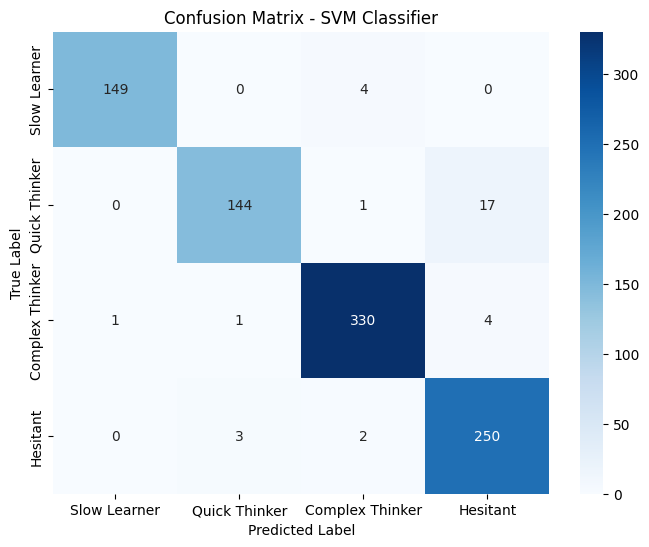

In [643]:
# visualize classificaion report for Group A using a heatmap
conf_matrix_svm = confusion_matrix(y_test, b)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#### _**Conclusion:**_

Upon examining the misclassifications, it is evident that the SVM model exhibits similar patterns to the KNN model. However, the frequency of misclassifications is notably lower with the SVM model compared to KNN. This is likely due to the fact SVM model better captures the underlying patterns in the data, resulting in improved performance.

## _**2. Cross Validation of the model of Group A features:**_

We will use k-fold cross-validation to assess the performance of the kNN model. [This technique splits the dataset into k subsets (folds), trains the model on k-1 folds, and evaluates it on the remaining fold. This process is repeated k times, with each fold serving as the test set exactly once.](https://medium.com/analytics-vidhya/a-complete-guide-to-choose-the-correct-cross-validation-technique-d70810a02f27#:~:text=It%20is%20the,any%20(K%2D1))

The choice of k-fold cross-validation is justified not only for its simplicity but also because it is suitable for datasets where the distribution of classes is (almost) evenly balanced. When examining the macro average and weighted average from the classification report, the similarity between these metrics suggests that the data is evenly distributed across different classes

[A value of k=10 is very common in the field of applied machine learning, and is recommended when struggling to choose a value for the dataset.](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85#:~:text=A%20value%20of%20k%3D10%20is%20very%20common%20in%20the%20field%20of%20applied%20machine%20learning%2C%20and%20is%20recommend%20if%20you%20are%20struggling%20to%20choose%20a%20value%20for%20your%20dataset.) And thus, we will use 10-fold cross-validation

In [644]:
scores = cross_val_score(svm_Group_A, X_Scaled, y, cv=10)
print(f"SVM Cross Validation Scores: {scores}")
print(f"SVM Cross Validation Mean Score: {np.mean(scores)}")
print(f"SVM Cross Validation Standard Deviation: {np.std(scores)}")

SVM Cross Validation Scores: [0.94481236 0.9580574  0.96688742 0.9580574  0.9602649  0.97792494
 0.98013245 0.96467991 0.9602649  0.96681416]
SVM Cross Validation Mean Score: 0.9637895836996229
SVM Cross Validation Standard Deviation: 0.00968056161631825


>> The mean score of 0.96 suggests that the model achieves reasonably good accuracy on average, while the low standard deviation of 0.00968 indicates that the model's performance is stable and reliable across different subsets of the data.

## _**4. Hyperparameter tuning using Group A features:**_

[A machine learning model has two types of parameters, (internal) parameters that are tuned during training and hyperparameters that can be specified (manually) for better performance when we create an instance from a model. The process of specifying hyperparameters manually can be both time consuming and not optimal.](https://fhict.instructure.com/courses/13770/pages/hyperparameter-tuning#:~:text=A%20machine%20learning,can%20be%20specified%3A)

We will use 'GridSearchCV' module from sklearn to perform hyperparameter tuning. 

In [645]:
from sklearn.model_selection import GridSearchCV

As a starting point, we will use these parameters as parameters.

In [646]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

We are using refit=True, which ensures that once the best hyperparameters are found, the model will be retrained on the entire dataset (both training and validation sets) using these optimal parameters. This helps in obtaining a final model that leverages all available data.

The default cross-validation strategy in GridSearchCV is k-fold, with the default number of folds being 5. To maintain a reasonable training speed, we will use the default 5-fold cross-validation rather than increasing it to 10 folds during the grid search.

In [647]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

Since we scaled the features after splitting previously, we will perform it on the whole features.

In [648]:
X_scaled = StandardScaler().fit_transform(X)

Next, we will perform the grid search using the scaled data

In [650]:
grid.fit(X_scaled, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.5s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [654]:
print("The best parameters are: ")
print(grid.best_params_)

The best parameters are: 
{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [655]:
grid_predictions = grid.predict(X_Group_A_test_scaled)

In [656]:
print("Accuracy Score of the SVM model with the best parameters: \n")
print(accuracy_score(y_test, grid_predictions))

Accuracy Score of the SVM model with the best parameters: 

0.9889624724061811


In [657]:
print("Classification Report of the SVM model with the best parameters: \n")
print(classification_report(y_test, grid_predictions))

Classification Report of the SVM model with the best parameters: 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       153
           1       0.99      1.00      0.99       162
           2       0.99      0.99      0.99       336
           3       0.99      0.99      0.99       255

    accuracy                           0.99       906
   macro avg       0.99      0.99      0.99       906
weighted avg       0.99      0.99      0.99       906



In [658]:
print("Confusion Matrix of the SVM model with the best parameters: \n")
print(confusion_matrix(y_test, grid_predictions))

Confusion Matrix of the SVM model with the best parameters: 

[[150   0   3   0]
 [  0 162   0   0]
 [  2   0 331   3]
 [  0   2   0 253]]


#### _**Conclusion**_

Based on the classification report and correlation matrix, it can be concluded there is no need to improvize to parameters to perform GridSearch again. Thus the model can be saved.

In [661]:
import joblib
joblib.dump(grid.best_estimator_, 'final_model.pkl')

['final_model.pkl']